In [2]:

import pandas as pd


from pandas._libs.tslibs.offsets import BusinessMixin

import matplotlib.pyplot as plt

In [3]:

# Let's read this csv data file into a dataframe:

df = pd.read_csv("business-licences.csv", sep=";", low_memory = False)

# Let's look at some general info about the dataframe:

print(df.shape)

(131740, 25)


In [4]:
# Let's look at the columns:

print(df.columns)

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom',
       'geo_point_2d'],
      dtype='object')


In [5]:
# We can start thinking about which ones we want to use later. 

# For now, let's make sure that we view all columns when we print the dataframe:

pd.set_option('display.max_columns', None)

# We can look at some example data:

print(df.head())

print(df.sample(10))

   FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
0          24     4491140     24-108817                     10   
1          24     4491148     24-108826                     10   
2          24     4491150     24-108829                     10   
3          24     4491164     24-108844                     10   
4          24     4491166     24-108846                     10   

                    BusinessName BusinessTradeName  Status  \
0             Imperva Canada ULC               NaN  Issued   
1  SuperNatural Game Studios Inc               NaN  Issued   
2               Ansys Canada Ltd               NaN  Issued   
3      Spark RE Technologies Inc               NaN  Issued   
4     Bit Quill Technologies Inc               NaN  Issued   

                  IssuedDate ExpiredDate  \
0  2023-12-19T11:37:18-08:00  2024-12-31   
1  2023-11-21T11:38:56-08:00  2024-12-31   
2  2024-03-01T13:13:58-08:00  2024-12-31   
3  2023-12-12T13:56:15-08:00  2024-12-31   
4  2024-06

In [6]:
# This helps us understand the data better, like for example, there are specific coordinates for many business licenses, but not all.

# Let's now look at the data types of each variable:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131740 entries, 0 to 131739
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FOLDERYEAR             131740 non-null  int64  
 1   LicenceRSN             131740 non-null  int64  
 2   LicenceNumber          131740 non-null  object 
 3   LicenceRevisionNumber  131740 non-null  int64  
 4   BusinessName           123071 non-null  object 
 5   BusinessTradeName      49803 non-null   object 
 6   Status                 131740 non-null  object 
 7   IssuedDate             114921 non-null  object 
 8   ExpiredDate            114939 non-null  object 
 9   BusinessType           131740 non-null  object 
 10  BusinessSubType        13744 non-null   object 
 11  Unit                   31581 non-null   object 
 12  UnitType               31412 non-null   object 
 13  House                  71613 non-null   object 
 14  Street                 71625 non-nul

In [7]:
# Hmm, I want to know more about geom and geo_point_2d. let's generate a sample of what it looks like:

#print(df['Geom'].sample(10))

# one of the samples: {"coordinates": [-123.121381503733, 49.2635970...

# That looks hard to manipulate. Maybe we can use geo_point_2d instead.

print(df['geo_point_2d'].sample(10)) 

57427     49.2835277122928, -123.066938791736
40277      49.263970218012, -123.133218152193
50009                                     NaN
7871                                      NaN
51162     49.2454998974377, -123.100853722428
4797                                      NaN
50742     49.2845352944803, -123.122008869142
66331                                     NaN
59935                                     NaN
106166     49.281460434441, -123.090572843955
Name: geo_point_2d, dtype: object


In [8]:
# Much better! We can maybe use this to plot coordinates later.

# Let's look at the number of null values for each variable:

print(df.isnull().sum())

FOLDERYEAR                    0
LicenceRSN                    0
LicenceNumber                 0
LicenceRevisionNumber         0
BusinessName               8669
BusinessTradeName         81937
Status                        0
IssuedDate                16819
ExpiredDate               16801
BusinessType                  0
BusinessSubType          117996
Unit                     100159
UnitType                 100328
House                     60127
Street                    60115
City                         35
Province                     48
Country                   25514
PostalCode                60628
LocalArea                  2717
NumberofEmployees             0
FeePaid                   64390
ExtractDate                   0
Geom                      65252
geo_point_2d              65252
dtype: int64


In [9]:
# It looks like geographical data is missing for 65252 observations. That'll be important when cleaning this data.

# Let's look at the unique values for business type:

print(df['BusinessType'].value_counts())

BusinessType
Long-term Rental                          29425
Health Care Professionals and Services    11547
General Contractor                        10128
Short-term Rental Operator                 8629
Retail Dealer                              6181
                                          ...  
Urban Farm Class A                            6
Marine Service Station                        4
Adult Services                                3
Amusement Park                                2
Oil Gas and Other Fuels                       2
Name: count, Length: 95, dtype: int64


In [10]:
# There are a lot!

# Let's now see the different values for status, and the distribution of status

print(df['Status'].value_counts())

Status
Issued                  109119
Pending                  11005
Gone Out of Business      4811
Inactive                  4112
Cancelled                 2693
Name: count, dtype: int64


In [11]:
# I'm curious on the variety of employee numbers too:

print(df['NumberofEmployees'].value_counts())

NumberofEmployees
0.0      47789
1.0      28541
2.0      11497
3.0       6459
4.0       5114
         ...  
117.0        1
232.0        1
710.0        1
963.0        1
830.0        1
Name: count, Length: 338, dtype: int64


In [12]:
# Interesting, some businesses have 0 and 1 employees, maybe indicating they are the whole business.

print(df['NumberofEmployees'].max())

5876.0


In [13]:
# Max # of employees is 5876. 

# Just for fun we can see the different counts for different local areas, to check variety.

print(df['LocalArea'].value_counts())

print(df['LocalArea'].nunique())

LocalArea
Downtown                    31389
Fairview                    10430
Kitsilano                    8511
Mount Pleasant               8259
Out of Town                  7823
West End                     6945
Kensington-Cedar Cottage     6735
Grandview-Woodland           5605
Renfrew-Collingwood          5415
Sunset                       4790
Marpole                      4475
Hastings-Sunrise             4295
Riley Park                   4177
Strathcona                   4157
Victoria-Fraserview          2677
Killarney                    2326
Dunbar-Southlands            2245
Arbutus-Ridge                1758
Kerrisdale                   1717
West Point Grey              1659
South Cambie                 1380
Oakridge                     1318
Shaughnessy                   898
UBC                            27
Arbutus Ridge                  12
Name: count, dtype: int64
25


In [14]:
# There is great variety in areas.

# Cleaning the data:

# Drop observations with a null geo_point_2d value:

df1 = df[df['geo_point_2d'].notnull()].copy()

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 66488 entries, 0 to 131727
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FOLDERYEAR             66488 non-null  int64  
 1   LicenceRSN             66488 non-null  int64  
 2   LicenceNumber          66488 non-null  object 
 3   LicenceRevisionNumber  66488 non-null  int64  
 4   BusinessName           66485 non-null  object 
 5   BusinessTradeName      33490 non-null  object 
 6   Status                 66488 non-null  object 
 7   IssuedDate             59716 non-null  object 
 8   ExpiredDate            59729 non-null  object 
 9   BusinessType           66488 non-null  object 
 10  BusinessSubType        12616 non-null  object 
 11  Unit                   29113 non-null  object 
 12  UnitType               28957 non-null  object 
 13  House                  66488 non-null  object 
 14  Street                 66488 non-null  object 
 15  City  

In [15]:
# (66488 observations kept)

# Check if there are any duplicate values:

print(df.duplicated().sum())

0


In [16]:

# No duplicates, so we can move on

# Group by local area and business type, for later:

df0 = df.groupby(['LocalArea', 'BusinessType'])

In [17]:

# We can now try creating a visual representation of the data, using geo_point_2d.
# We do have a slight problem though, if we want to graph based on two axises, we need to split the column into two.
# Let's do just that:

df1[['lat', 'long']] = df1['geo_point_2d'].str.split(',', expand = True)

print(df1.sample(2))

        FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
128768          25     4650351     25-142628                      0   
110129          25     4642018     25-134295                      0   

                                 BusinessName  BusinessTradeName  Status  \
128768  Delayne M Sartison (Delayne Sartison)  Roper Greyell LLP  Issued   
110129                     Henson Fashion Ltd                NaN  Issued   

                       IssuedDate ExpiredDate  \
128768  2024-11-20T16:13:56-08:00  2025-12-31   
110129  2024-11-18T16:03:02-08:00  2025-12-31   

                                         BusinessType BusinessSubType  Unit  \
128768                                 Legal Services             NaN  1850   
110129  Non-Food Manufacturer Assembler and Processor             NaN   NaN   

       UnitType House         Street       City Province Country PostalCode  \
128768     Unit   745     THURLOW ST  Vancouver       BC      CA    V6E 0C5   
110129      N

In [18]:
# Okay great we now have separate columns for latitude and longitude. 
# They are still strings though, so we need to convert them to floats.

df1[['lat', 'long']] = df1[['lat', 'long']].astype(float)

print(df1.sample(2))

print(df1.info())

       FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
21150          24     4526939     24-146838                     10   
14416          24     4518316     24-137923                     11   

                          BusinessName BusinessTradeName  Status  \
21150       Salty Sugar Patisserie Ltd               NaN  Issued   
14416  Lolita Rudovica Law Corporation            LR-Law  Issued   

                      IssuedDate ExpiredDate          BusinessType  \
21150  2023-11-20T16:13:31-08:00  2024-12-31  Retail Dealer - Food   
14416  2024-02-12T11:27:00-08:00  2024-12-31        Legal Services   

      BusinessSubType Unit UnitType House          Street       City Province  \
21150             NaN  NaN      NaN  6947  VICTORIA DRIVE  Vancouver       BC   
14416             NaN  600     Unit   777       HORNBY ST  Vancouver       BC   

      Country PostalCode            LocalArea  NumberofEmployees  FeePaid  \
21150      CA    V5P 3Y7  Victoria-Fraserview       

24


/tmp/ipykernel_249/3108547755.py:17: UserWarning: 
The palette list has fewer values (20) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


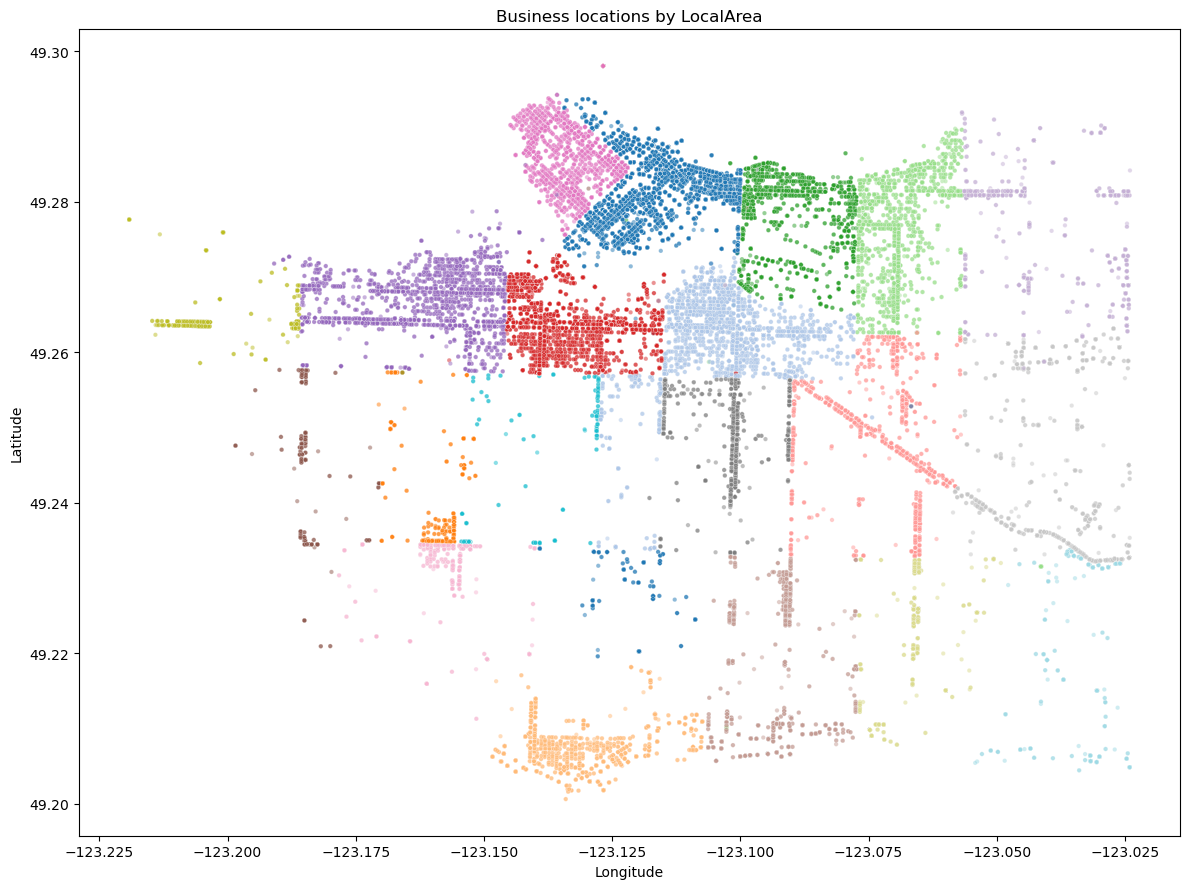

In [19]:
# Great. Now we can make a scatterplot with longitude and latitude, to see where business locations are distributed.

# Use seaborn for a nicer scatterplot by Business Type:
import seaborn as sns


if 'LocalArea' not in df1.columns:
    df1['LocalArea'] = 'Unknown'

unique_local_areas = df1['LocalArea'].nunique()

print(unique_local_areas)



plt.figure(figsize=(12, 9))
sns.scatterplot(
    data=df1,
    x='long',
    y='lat',
    hue='LocalArea',
    s=10,
    alpha=0.5,
        palette=sns.color_palette("tab20", n_colors=min(20, unique_local_areas)),
        legend=False
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Business locations by LocalArea')
plt.tight_layout()
plt.show()

91


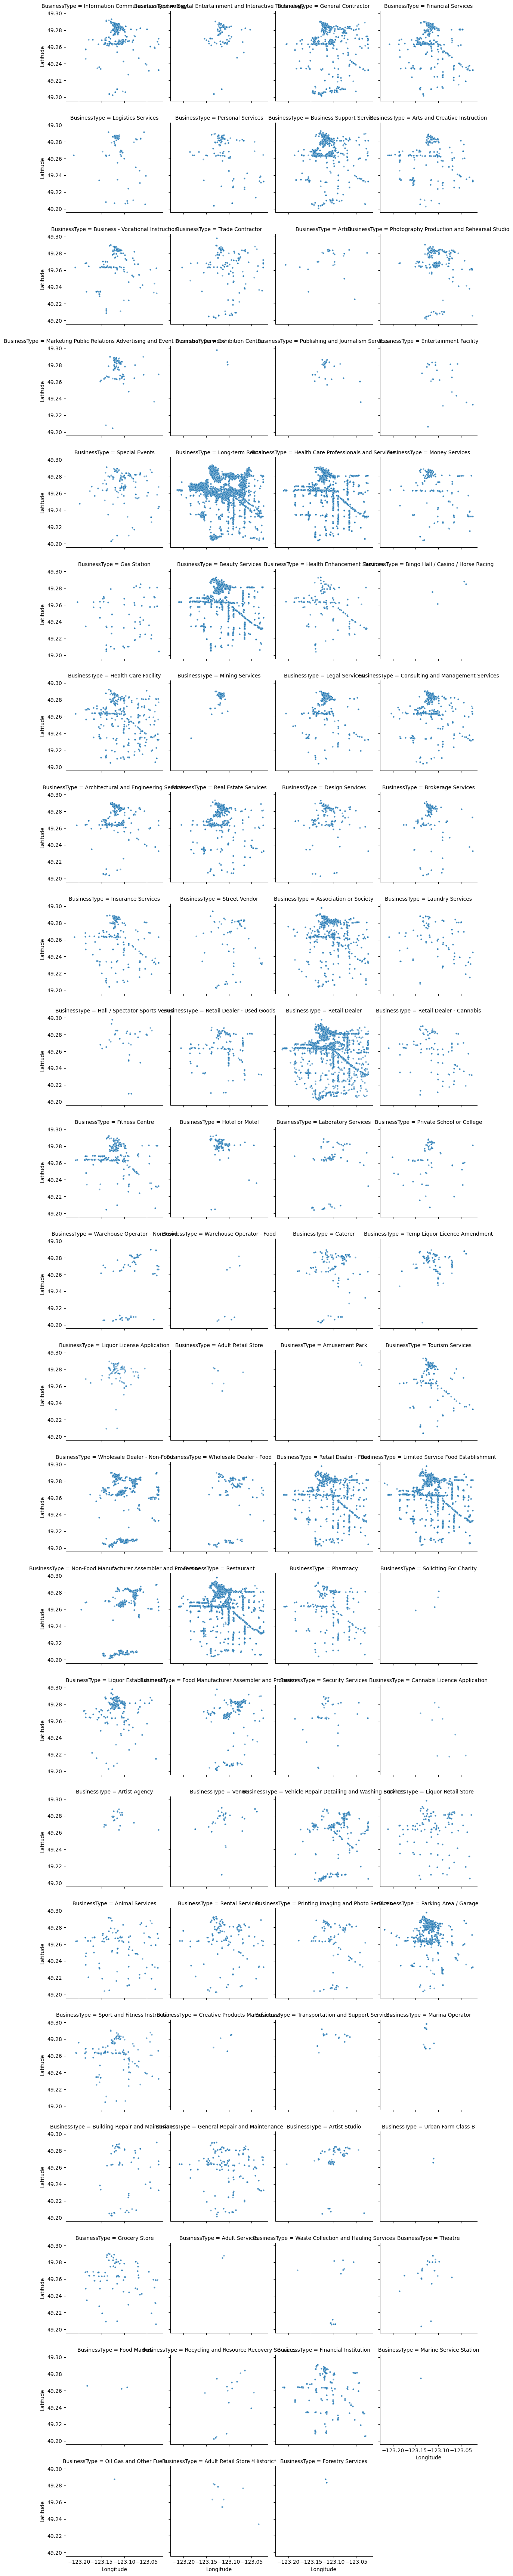

Saved faceted_business_locations.png


In [20]:
# It looks crowded, so let's use faceting to separate by BusinessType instead:

unique_biz_types = df1['BusinessType'].nunique()

print(unique_biz_types)

g = sns.relplot(
    data=df1,
    x='long',
    y='lat',
    col='BusinessType',
    col_wrap=4,            # panels per row
    height=3,              # height per facet (inches)
    aspect=1,              # width = height * aspect
    kind='scatter',
    s=10,
    alpha=0.6,
    facet_kws={'sharex': True, 'sharey': True}
)

g.set_axis_labels("Longitude", "Latitude")
plt.tight_layout()
plt.show()  # optional
print("Saved faceted_business_locations.png")

In [21]:
# Alright, wow! That's a lot of graphs, and calls for a different way of initial analysis methods. 
# Something tor realize now is that if we are using spacial data to analyze over/undersaturation,
# we shouldn't account for businesses types that are strictly online/are not location dependant.
# So, we will filter out registrations of the following business type:

drop_types = [
    'Information Communication Technology',
    'Digital Entertainment and Interactive Technology',
    'Publishing and Journalism Services',
    'Marketing Public Relations Advertising and Event Promotion Services',
    'Consulting and Management Services',
    'Business Support Services',
    'Design Services',
    'Architectural and Engineering Services',
    'Legal Services',
    'Insurance Services',
    'Financial Services',
    'Financial Institution',
    'Brokerage Services',
    'Real Estate Services',
    'Artist Agency',
    'Association or Society',
    'Mining Services',
    'Forestry Services',
    'Oil Gas and Other Fuels',
    'Logistics Services',
    'Transportation and Support Services',
    'Warehouse Operator - Food',
    'Warehouse Operator - Non-Food',
    'Wholesale Dealer - Food',
    'Wholesale Dealer - Non-Food',
    'Non-Food Manufacturer Assembler and Processor',
    'Food Manufacturer Assembler and Processor',
    'Recycling and Resource Recovery Services',
    'Waste Collection and Hauling Services',
    'Marine Service Station',
    'Soliciting For Charity',
    'Cannabis Licence Application',
    'Liquor License Application',
    'Temp Liquor Licence Amendment',
    'Adult Retail Store *Historic*'
]

df_filtered_0 = df1[~df1['BusinessType'].isin(drop_types)].copy()

print(df_filtered_0.sample(n = 10))


        FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
89757           25     4710565     25-187352                      0   
13722           24     4524397     24-144162                     10   
80283           25     4618051     25-110330                      0   
61183           24     4513236     24-132254                     10   
97402           25     4629290     25-121569                      0   
121654          25     4643383     25-135660                      0   
24020           24     4505375     24-124565                     10   
116235          25     4621263     25-113542                      0   
32812           24     4504568     24-123688                     10   
18597           24     4504393     24-123503                     10   

                                        BusinessName  \
89757                              UZBEK CUISINE INC   
13722                     Pappajohn Marine Group Inc   
80283   Vancouver College of Counsellor Training L

In [22]:
# Now, we are only considering businesses that are physical-dependant.
# However, we have some industries that are zoning/infrastructure driven. Let's fix that.

infrastructure_types = [
    'Mining Services',
    'Forestry Services',
    'Oil Gas and Other Fuels',
    'Logistics Services',
    'Transportation and Support Services',
    'Warehouse Operator - Food',
    'Warehouse Operator - Non-Food',
    'Wholesale Dealer - Food',
    'Wholesale Dealer - Non-Food',
    'Non-Food Manufacturer Assembler and Processor',
    'Food Manufacturer Assembler and Processor',
    'Recycling and Resource Recovery Services',
    'Waste Collection and Hauling Services',
    'Marine Service Station',
    'Parking Area / Garage'
]


df_filtered_1 = df_filtered_0[~df_filtered_0['BusinessType'].isin(infrastructure_types)].copy()

print(df_filtered_1.sample(n = 5))

print(df_filtered_1['BusinessType'].unique())

print(df_filtered_1['BusinessType'].nunique())

       FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
1724           24     4504270     24-123373                     10   
24802          24     4484529     24-101971                     10   
77294          25     4621673     25-113952                      0   
37230          24     4511960     24-173273                     10   
13969          24     4525357     24-145239                     10   

                                           BusinessName  \
1724                                      (Dale Steele)   
24802  YWL Global Investment Consulting & Education Inc   
77294                                  (Patricia Roles)   
37230                                   (Karen Fleming)   
13969     Truth And Beauty Photographic Enterprises Ltd   

                       BusinessTradeName                Status  \
1724                                 NaN  Gone Out of Business   
24802                                NaN                Issued   
77294                     

In [23]:
# Our analysis would also not be as viable if the business type has limited data.

# We want to make sure we only compute recommendations where there is enough local evidence.

# Well, we have 25 distinct locations. Let's say we want about 10 registrations per location,
# and 12 for more populated areas. We can then filter for business types with at least (25 * 12) 300
# registrations:

type_counts = df_filtered_1['BusinessType'].value_counts()

print(type_counts)



BusinessType
Health Care Professionals and Services           8602
Long-term Rental                                 7407
Retail Dealer                                    4884
Restaurant                                       3930
Beauty Services                                  3085
Limited Service Food Establishment               2960
Retail Dealer - Food                             1504
General Contractor                               1402
Health Care Facility                              737
Vehicle Repair Detailing and Washing Services     648
Photography Production and Rehearsal Studio       545
Liquor Establishment                              462
Fitness Centre                                    458
Caterer                                           439
Arts and Creative Instruction                     429
Pharmacy                                          403
Special Events                                    378
Tourism Services                                  348
Money Services 

In [24]:
# That gave us this list of the remaining business types, and the count of registrations.
#  A sufficient amount of them have observations over 300, so let's finish our filtering process:

big_types = type_counts[type_counts > 300]

# make into list of business types:

big_types = big_types.index.tolist()


df_filtered = df_filtered_1[df_filtered_1['BusinessType'].isin(big_types)].copy()


print(df_filtered['BusinessType'].nunique())

print(df_filtered['BusinessType'].value_counts().min())


21
306


In [40]:
# Great! Now, we have 21 business types, all with registrations over 300.
# We now have our filtered business types, containing only business types
# that are influenced by location and sufficiently large for our purposes.

# Another comment to note is that our dataset still has observations that 
# contain the status "Gone Out of Business", "Inactive", and "Canceled".
# We want to build some metric for concentration on a specific area per business type.
# This means we should only be considering registrations that are still active. However,
# we don't want to discount the other observations completely, as they will be useful for
# understanding the momentum of growth and decline for an area. For now, we will just focus
# on concentration, and create a new dataframe with only issued observations:

df_issued = df_filtered[df_filtered['Status'] == "Issued"].copy()

print(df_issued['Status'].unique())

['Issued']


Nice. Now, let's first focus on how we will quantify how concentrated an area is for a business type.

We need to think of a metric for concentration that accounts for the fact that there will be more naturally businesses in more populated areas, like Downtown. This means we need a concentration value that takes into account the context of the location.

Here's how we will compute a concentration score.

Given a certain location, L, and business type, T, let:

A = The count of issued businesses of type T in L

B = The total amount of issued businesses in L

C = The count of issued businesses of type T in the entire city

D = The total amount of issued businesses in the entire city

With these values set, we can then construct:

Location Proportion = A / B = A value that measures the proportion of type T businesses in L,
                      to the rest of the businesses in L.

Total Proportion = B / C = A value that measures the proportion of type T businesses in all of
                       Vancouver to the rest of the businesses in all of Vancouver. 
    
Then, we can finally construct our concentration score:

Concentration Score = Location Proportion / Total Proportion

How should we interpret this? Well, this score compares the proportion of businesses of type T in a location with the the proportion of businesses as a whole. This means that a greater score indicates that a location might be oversaturated, as the proportion of type T businesses in L is greater than the proportion of type T businesses in all of Vancouver. Vice versa for a lower value. A value of one would show that the proportion in the location is equal to the proportion for Vancouver as a whole. It's important to note that a lower concentration score would hint to some possible growth in that area for the selected business type. However, there are other factors to consider.

We will discuss these other factors momentarily, but for now, let's put into practice our concentration value:





In [41]:
# Let's create a function that takes location and business type as an input, 
# and outputs the concentration score:

def concentration_score(df, business_type, local_area):

    A = df[
            (df['BusinessType'] == business_type) &
            (df['LocalArea'] == local_area)].shape[0]

    B = df[df['LocalArea'] == local_area].shape[0]

    C = df[df['BusinessType'] == business_type].shape[0]

    D = df.shape[0]

    location_prop = A / B

    total_prop = C / D

    return location_prop / total_prop

# Let's test how this function works:

print(concentration_score(df_issued, 'Restaurant', 'Downtown'))

print(concentration_score(df_issued, 'Restaurant', 'Marpole'))

print(concentration_score(df_issued, 'Tourism Services', 'Marpole'))

print(concentration_score(df_issued, 'Tourism Services', 'Mount Pleasant'))


1.3462898663946818
0.4870734528629265
1.3305421151377506
0.6472765935642549


We can see our function at work above. We would interpret these results by declaring that the data suggests that restaurants are saturated in Downtown, and undersaturated in Marpole. We would also say that the data suggests that tourism services are oversaturated at Marpole, but undersaturated at Mount Pleasant.

This brings up an interesting point, and one we need to consider if we want our results to be credible- Tourism services might not be undersaturated at Mount Pleasant, as it could just be that the area calls for less street vendors than then the average area in Vancouver. This concentration score alone cannot adequately determine if a type of business has room for growth, and it calls for another metric to determine that by. 

At the very end of it, no matter what, there must be some discretion when determining results. However, we can create another metric to measure how a new business of some type may perform at some location, to help us make that conclusion.

What can we still measure? Currently, we have done some spatial analysis, but we can also try some temporal analysis to create some form of metric for momentum:

Let's ask the question of, “Are businesses of this type still being opened in this location, or are they failing/disappearing?”, using status to help us. 

There are two main statuses that we will use, and those are, 'Issused', 'Inactive', and 'Gone Out of Business'. We will say that registrations of status 'Issued' are "entries", the registrations of status 'Inactive' are inactives, and registrations of status 'Gone Out of Business', are exits, and compare the ratio of these values. It is important to note at this point that there are other statuses, 'Pending' and 'Canceled'. however these statuses would have little correlation, if not none, correlation on how the market for a certain business type is performing in a certain area. So, we will use issued registrations and busineeses, inactive businesses, and ones that have gone out of businesses exclusively. It is also useful to note that this dataset contains registrations no older than 2023. This means that issued businesses are more likely to be active now, as opposed to stale but not recorded as 'Inactive' or 'Gone Out of Business'.

So given a certain business type and location, let's define:

count_active = the number of Status == 'Issued' registrations

count_exits = the number of Status == 'Gone Out of Business' registrations

count_inactives = 
    the number of Status == 'Inactive' registrations

gone_rate = 
    (count_exits + count_inactives) / count_entries



The way we would interpret this is that the greater the gone_rate, the more evidence to suggest that businesses of this type and area are at risk of losing business. However, it is difficult to interpret this score:


In [42]:
print(df_filtered['Status'].value_counts())

Status
Issued                  33686
Pending                  2443
Gone Out of Business     1553
Inactive                 1323
Cancelled                 567
Name: count, dtype: int64


We can see here that the count of the numerator of baseline_gone_rate for all business registrations in the dataset is far lesser than the denominator, so this value will almost always be a value lesser than 1, and a small value overall. So how can we reasonably be able to interpet this, with a baseline standard of 1?

Well, we can define

baseline_gone_rate =

(total Vancouver count_inactives + total Vancouver count_exits) / total Vancouver count_entia

relative_gone_risk = gone_rate / baseline_gone_rate

Now, we have the average "gone rate" for all of Vancouver, and we are comparing our specific city/business type value with said average, so when this value equals 1, it means the failing risk value is about equal with the normal. When it is greater than 1, the failing risk is greater than normal. Let's apply these definitions into code:

In [43]:
gone_statuses = ['Gone Out of Business', 'Inactive']

def relative_gone_risk(business_type, local_area):

    count_active = df_issued[ 
        (df_issued['BusinessType'] == business_type) &
        (df_issued['LocalArea'] == local_area)].shape[0]

    count_gone = df_filtered[
        (df_filtered['BusinessType'] == business_type) &
        (df_filtered['LocalArea'] == local_area) &
        (df_filtered['Status'].isin(gone_statuses))].shape[0]

    gone_rate = count_gone / count_active

    city_active = df_issued[df_issued['BusinessType'] == business_type].shape[0]

    city_gone = df_filtered[(df_filtered['BusinessType'] == business_type) &
                            (df_filtered['Status'].isin(gone_statuses))].shape[0]

    baseline_gone_rate = city_gone / city_active 

    relative_risk = gone_rate / baseline_gone_rate

    return relative_risk


print(relative_gone_risk('Restaurant', 'West Point Grey'))

print(relative_gone_risk('Restaurant', 'Marpole'))     

0.8583509513742072
1.1839323467230445


The way we would interpret above is that restaurants in West Point Grey have a greater risk of having to close their business, compared to restaurants in Marpole, which has a lesser closing rate than the average of all of Vancouver.

This metric helps us reach some sort of likelihood that if we start a type of business at a certain location, we would end up having to end that business. However, there is still much ambiguity in this metric. Businesses can close/become inactive for a likelihood of reasons, which are not always involved with the market of the area. We will need to use other metrics to better conclude the plausibility of starting a type of business in a certain location. However, this is another helpful metric to use.

Let's define one more metric before putting things together. This metric will more directly involve temporal factors, more specifically, how recent the most issued businesses were registered. This matters as it helps us quantify momentum, or the rate of which businesses are still being opened. If the most recent businesses in a certain place were opened several months ago, that would maybe suggest that there is now less incentive to open the same type of business there, for whatever reason.

What we will do to create this metric is to take the "n" most recent registrations of a given location/business type, and then take the mean of their registration date. We would interpret that the greater this temporal score, the less momentum there would be to start that type of business there.

How should we choose our "n" value, or the number of the most recent registrations to consider? When I started thinking about this metric, I had a certain number in mind. However, assigning this value to a constant is difficult. This is because of the density of some areas, as well as their business types, compared to others. For example, say we chose the 5 most recent registrations. Well, for one of the smaller areas/less populated business types, that may be a large portion of the registrations. However, for say, restaurants in Downtown, that is a small fraction of all the restaurants in the area. Many are likely to open in a given time frame, so this number would almost always be lesser than for another business type/area, making this metric difficult to interpret/on an inconsistent scale.

What we would have to do is for a given location and business type, count the amount of registrations with those conditions, then calculate a recent portion of the businesses in the area instead. Choosing this ratio involves much intuition, and the best ratio to use can differ from case to case. It is cumbersome to assign a certain ratio for every single combination of business type and location, so for our uses, then most recent 1/7th registrations will be adequate.

We also need to standardize this in some way, for interpretability, and also so that we can use it in tandem to the other metrics we created. So, we will use:

Relative recency = 


The most recent issue date in the dataset (we will use this value as a placeholder for whatever "today" is, so it is reproducible) - (Average date of the 1/7th most recently issued business registrations with the local area and business type)

divided by:

The most recent issue date in the dataset (we will use this value as a placeholder for whatever "today" is, so it is reproducible) - 
(Average date of the 1/7th most recently issued business registrations with the given business type)


Let's start putting together this metric.

In [44]:
# Let's first see the type of data that IssuedDate is, if there are any null values
# for it, and how we can manipulate it so we can use it:

print(df_issued['IssuedDate'].info())

print(df_issued['IssuedDate'].sample(n = 3))

print(df_issued['IssuedDate'].isnull())

print(df_issued['IssuedDate'].isnull().sum())

<class 'pandas.core.series.Series'>
Index: 33686 entries, 57 to 131727
Series name: IssuedDate
Non-Null Count  Dtype 
--------------  ----- 
33686 non-null  object
dtypes: object(1)
memory usage: 526.3+ KB
None
102703    2024-11-15T09:25:19-08:00
79438     2024-11-26T10:39:26-08:00
24550     2023-12-21T09:52:15-08:00
Name: IssuedDate, dtype: object
57        False
58        False
60        False
62        False
65        False
          ...  
131706    False
131710    False
131712    False
131715    False
131727    False
Name: IssuedDate, Length: 33686, dtype: bool
0


In [74]:
import math

# We can see that there are no null values for IssuedDate, and that it is of data type object
# with form ISO 8601. This means we can convert it from string objects to date/time:

df_issued['IssuedDate_dt'] = pd.to_datetime(df_issued['IssuedDate'], errors = 'coerce', utc = True)

df_date = df_issued.dropna(subset = ['IssuedDate_dt']).copy()

today_ref = df_issued['IssuedDate_dt'].max()

def relative_recency(business_type, local_area):

    def mean_of_recent_fraction(sub):
        n= sub.shape[0]

        k = int(math.ceil(1/7 * n))

        recent = sub.sort_values('IssuedDate_dt', ascending = False).head(k)

        # We used ceil, as multiplying by 1/7 can cause decimals- we will just round up.
        # We also used utc, so it's all under a universal time zone (just  as safety measure)
        # We will then average datetimes by converting to int64 nanoseconds, averaging,
        # then converting back to datetime.
        
        mean_dt = pd.to_datetime(recent['IssuedDate_dt'].astype('int64').mean(), utc = True)

        return k, mean_dt

    # Now creating the local subset for biztype and local area:
    local_sub  = df_date[
                         (df_date['BusinessType'] == business_type) &
                         (df_date['LocalArea'] == local_area)]
    k_local, local_mean_dt = mean_of_recent_fraction(local_sub)
    if local_mean_dt is None:
        return None

    # And the baseline subset- for the biztype citywide

    city_sub = df_date[df_date['BusinessType'] == business_type]
    k_city, city_mean_dt = mean_of_recent_fraction(city_sub)
    if city_mean_dt is None:
        return None

    # Now we will convert mean dates into an "age", relative to
    # today_ref, to yield a non-negative number of days. A greater
    # age would indicate less recency.

    local_age_days = (today_ref - local_mean_dt).days
    baseline_age_days = (today_ref - city_mean_dt).days

    
    # Below is to guard against dividing by 0- which just means 
    # insanely recent!
    if baseline_age_days == 0:
        return 0

    rel = local_age_days / baseline_age_days

    return rel



print(relative_recency('Restaurant', 'Marpole'))

print(relative_recency('Restaurant', 'Sunset'))
    
                        



        


1.1607142857142858
0.7455357142857143


The way we would interpret the results above is that the most recent restaurants opening in Sunset were registered more recently than in Marpole, suggesting that 